In [17]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
#     -O /tmp/rps.zip
  
# !wget --no-check-certificate \
#     https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
#     -O /tmp/rps-test-set.zip

--2019-02-13 22:46:40--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com... 2607:f8b0:4003:c0a::80, 64.233.171.128
Connecting to storage.googleapis.com|2607:f8b0:4003:c0a::80|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: '/tmp/rps.zip'

/tmp/rps.zip        100%[=====================>] 191.38M   168MB/s   in 1.1s   

2019-02-13 22:46:41 (168 MB/s) - '/tmp/rps.zip' saved [200682221/200682221]

--2019-02-13 22:46:42--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com... 2607:f8b0:4003:c11::80, 74.125.127.128
Connecting to storage.googleapis.com|2607:f8b0:4003:c11::80|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: '/tmp/rps-tes

In [1]:
import os
import zipfile

# local_zip = '/tmp/rps.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/')
# zip_ref.close()

# local_zip = '/tmp/rps-test-set.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp/')
# zip_ref.close()

In [2]:
apple_dir = os.path.join('./Training/apple/')
mango_dir = os.path.join('./Training/mango/')
orange_dir = os.path.join('./Training/orange/')


print('total training apple images:', len(os.listdir(apple_dir)))
print('total training mango images:', len(os.listdir(mango_dir)))
print('total training orange images:', len(os.listdir(orange_dir)))


apple_files = os.listdir(apple_dir)
print(apple_files[:10])

mango_files = os.listdir(mango_dir)
print(mango_files[:10])

orange_files = os.listdir(orange_dir)
print(orange_files[:10])


total training apple images: 193
total training mango images: 175
total training orange images: 235
['apple1_10.jpg', 'apple1_14.jpg', 'apple1_16.jpg', 'apple1_18.jpg', 'apple1_2.jpg', 'apple1_23.jpg', 'apple1_24.jpg', 'apple1_26.jpg', 'apple1_27.jpg', 'apple1_28.jpg']
['mango1_10.jpg', 'mango1_11.jpg', 'mango1_12.jpg', 'mango1_13.jpg', 'mango1_14.jpg', 'mango1_15.jpg', 'mango1_16.jpg', 'mango1_17.jpg', 'mango1_18.jpg', 'mango1_2.jpg']
['orange1_1.jpg', 'orange1_10.jpg', 'orange1_11.jpg', 'orange1_13.jpg', 'orange1_16.jpg', 'orange1_19.jpg', 'orange1_2.jpg', 'orange1_20.jpg', 'orange1_21.jpg', 'orange1_23.jpg']


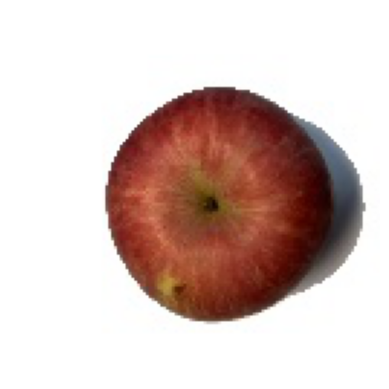

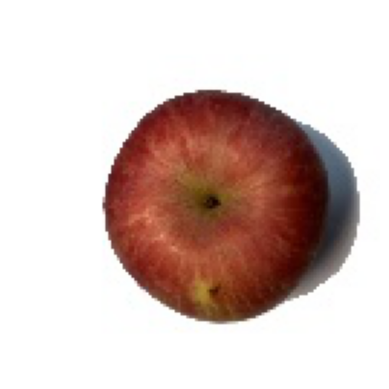

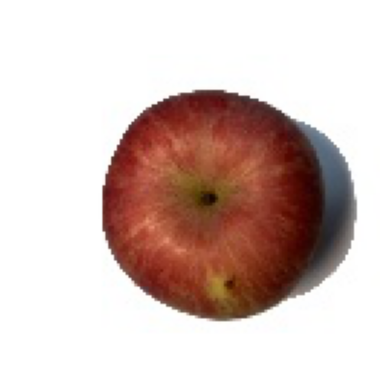

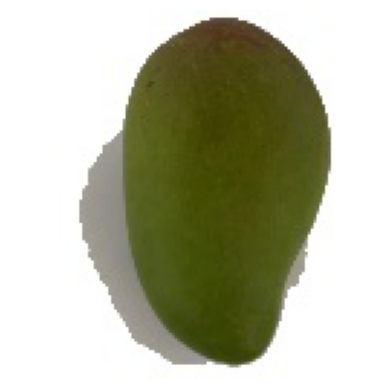

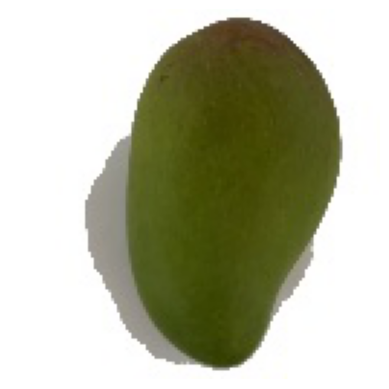

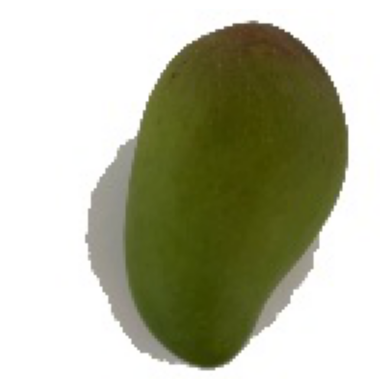

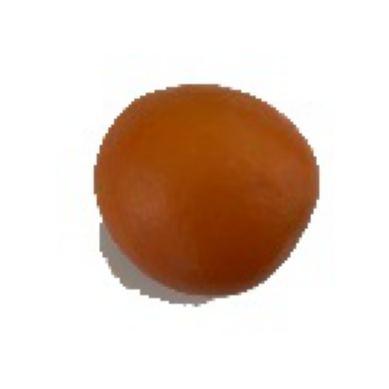

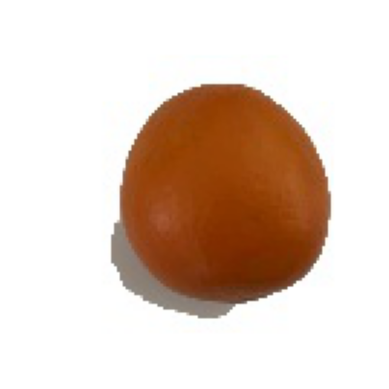

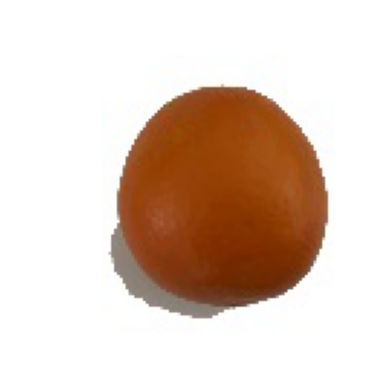

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 3

next_apple = [os.path.join(apple_dir, fname) 
                for fname in apple_files[pic_index-3:pic_index]]
next_mango = [os.path.join(mango_dir, fname) 
                for fname in mango_files[pic_index-3:pic_index]]
next_orange = [os.path.join(orange_dir, fname) 
                for fname in orange_files[pic_index-3:pic_index]]


for i, img_path in enumerate(next_apple+next_mango+next_orange):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [26]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./Training/"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=20,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./Test/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(128,128),
	class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(128,128),
	class_mode='categorical'
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (5,5), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
#     tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
#     tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, validation_data = validation_generator, verbose = 1)

model.save("rps.h5")


Found 603 images belonging to 3 classes.
Found 172 images belonging to 3 classes.
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 124, 124, 16)      1216      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 62, 62, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 58, 58, 32)        12832     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 29, 29, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 25, 25, 64)        51264     
                                     

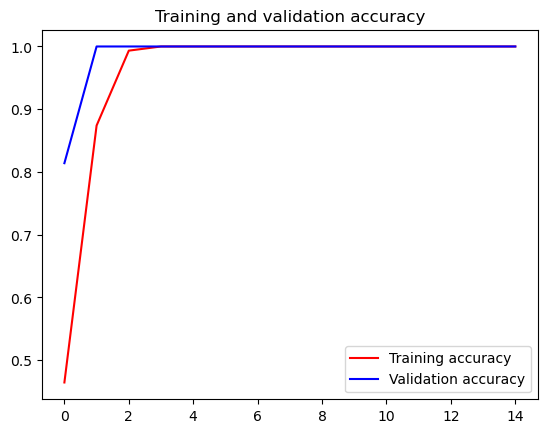

<Figure size 640x480 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

1/1 [==============================] - 0s 35ms/step
[[0. 1. 0.]]
这是芒果


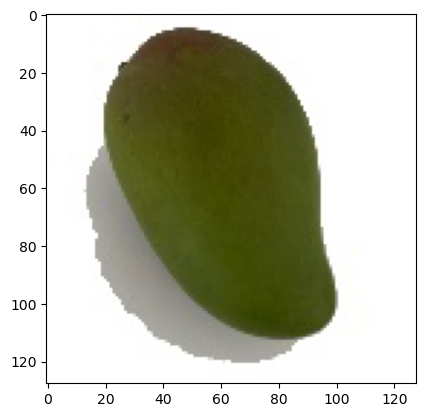

In [29]:
import numpy as np
from keras.utils import image_utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path = './mango-ok/test/mango1_64.jpg'
img = mpimg.imread(img_path)
test_image = image_utils.load_img(img_path , target_size=(128, 128))
test_image = np.expand_dims(test_image, axis=0)
prediction = model.predict(test_image)
print(prediction)
fruit_labels = ['苹果', '芒果', '橙子']
predicted_class_index = np.argmax(prediction)
fruit_label = fruit_labels[predicted_class_index]

print("这是" + fruit_label )

plt.imshow(img)



In [20]:
import csv

with open('history.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['accuracy', 'val_accuracy', 'loss', 'val_loss'])
    for i in range(len(acc)):
        writer.writerow([acc[i], val_acc[i], loss[i], val_loss[i]])

NameError: name 'x_train' is not defined